In [4]:
import pandas as pd

df = pd.read_csv('metrics.csv')
df

,B2,B3,B4,Rouge1,Rouge2,RougeL,RougeLsum,turn
0,4.887165e-01,3.728102e-01,5.554672e-78,0.888889,0.857143,0.888889,0.888889,1
1,3.279834e-01,2.306645e-01,1.631248e-01,0.600000,0.384615,0.600000,0.600000,2
2,6.305110e-155,4.415679e-204,9.751522e-232,0.484848,0.387097,0.484848,0.484848,3
3,1.984801e-01,1.122913e-01,2.028801e-78,0.461538,0.131579,0.250000,0.435897,4
4,1.382128e-02,8.225271e-104,5.693312e-156,0.415094,0.142857,0.333333,0.409091,5
...,...,...,...,...,...,...,...,...
95,4.612743e-155,3.730955e-204,8.817250e-232,0.740741,0.480000,0.666667,0.666667,5
96,4.122563e-155,3.066681e-204,6.967408e-232,0.380952,0.205128,0.341463,0.341463,6
97,4.306075e-155,3.918479e-204,9.788429e-232,0.412698,0.266667,0.380952,0.412698,7
98,9.872169e-156,7.399387e-205,1.687108e-232,0.266667,0.068182,0.263158,0.263158,8


## performance in depth analysis

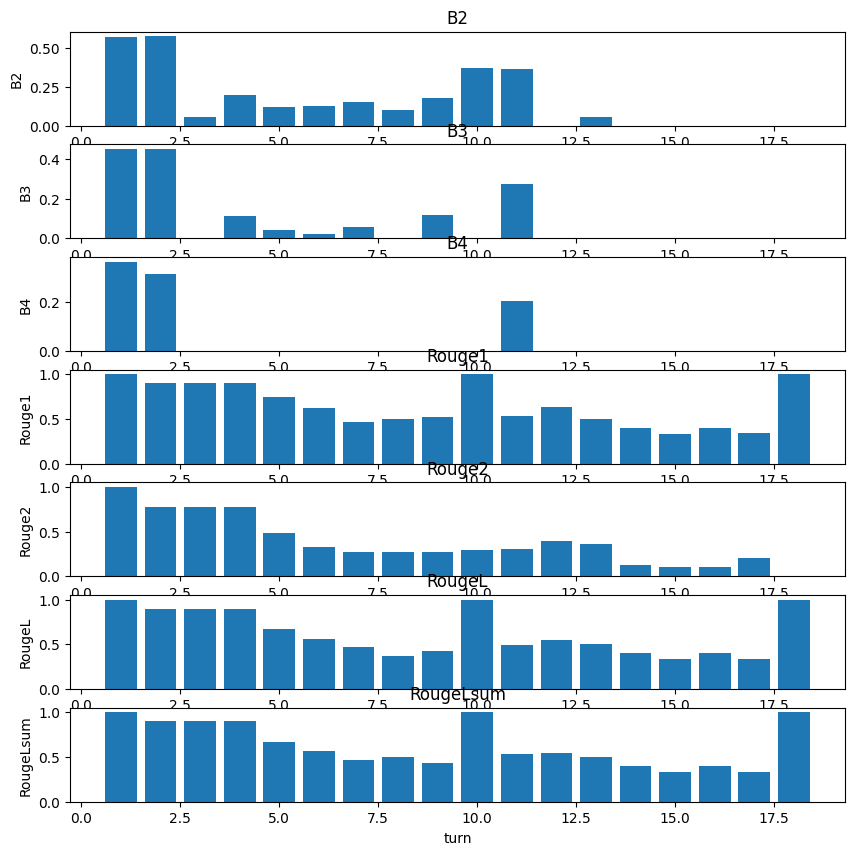

In [9]:
import matplotlib.pyplot as plt

ycols = [y for y in df.columns if y != 'turn']
xcol = 'turn'


#todo: what is the jump in turn 10
# plot each y col wrt xcol in subplots
# for each subplot plot plot bar plot
fig, axs = plt.subplots(len(ycols), 1, figsize=(10, 10))
for i, ycol in enumerate(ycols):
    axs[i].bar(df[xcol], df[ycol])
    axs[i].set_title(ycol)
    axs[i].set_xlabel(xcol)
    axs[i].set_ylabel(ycol)

## analyzing prediction results for strategy classifier in ExTES dataset

### checking the distribution of train data

/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

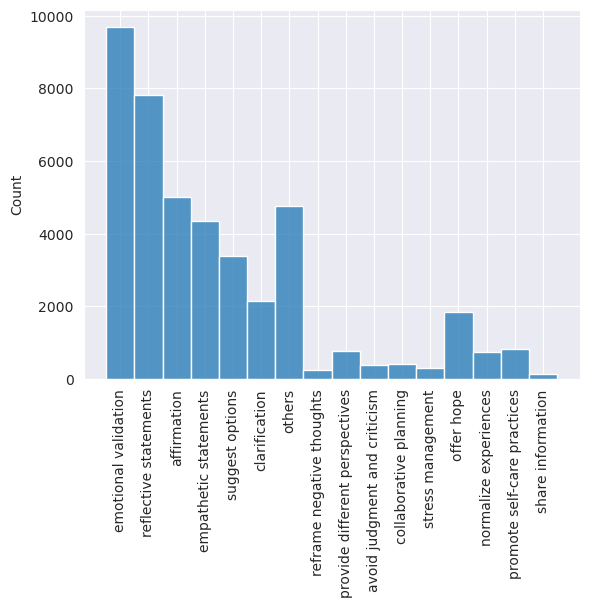

In [4]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

test_ds = []
with open('data/ExTES/sfe_train.json', 'r') as f:
    for line in f:
        test_ds.append(json.loads(line))
    
labels = [x['strategy'] for x in test_ds]

#rotate xticks
plt.xticks(rotation=90)
sns.histplot(labels)

In [47]:
import pandas as pd

df = pd.read_csv('data/ExTES/test_strategy_results.txt', sep='\t')
preds = df['prediction'].values
preds[:10]

array(['Suggest Options', 'Empathetic Statements', 'Affirmation',
       'Suggest Options', 'Clarification', 'Reflective Statements',
       'Emotional Validation', 'Reflective Statements',
       'Empathetic Statements', 'Suggest Options'], dtype=object)

In [48]:
import json

test_ds = []
with open('data/ExTES/sfe_test.json', 'r') as f:
    for line in f:
        test_ds.append(json.loads(line))
    
labels = [x['strategy'] for x in test_ds]
labels[:10]

['Suggest Options',
 'Empathetic Statements',
 'Affirmation',
 'Suggest Options',
 'Clarification',
 'Reflective Statements',
 'Emotional Validation',
 'Reflective Statements',
 'Empathetic Statements',
 'Suggest Options']

In [49]:
# import label encoder and encode both labels and preds
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
preds = le.transform(preds)

preds[:10], labels[:10]

(array([14,  5,  0, 14,  2, 10,  4, 10,  5, 14]),
 array([14,  5,  0, 14,  2, 10,  4, 10,  5, 14]))

In [50]:
# calculate accuracy, precision, recall, f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro', zero_division=0.0)
print(f'precision: {precision}, recall: {recall}, f1: {f1}')

precision: 0.9174095270533699, recall: 0.90783410935897, f1: 0.9125098533077055


In [51]:
from sklearn.metrics import classification_report

print(classification_report(labels, preds, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14935
           1       0.00      0.00      0.00         3
           2       0.98      0.98      0.98       914
           3       0.99      0.95      0.97       995
           4       0.98      0.98      0.98      8163
           5       0.97      0.97      0.97      4534
           6       0.99      0.99      0.99      1482
           7       0.99      0.98      0.99      4137
           8       0.99      0.99      0.99      1889
           9       0.98      0.96      0.97      1534
          10       0.99      0.96      0.97      4248
          11       0.98      0.96      0.97       409
          12       0.97      0.92      0.94       238
          13       0.98      0.99      0.98       696
          14       0.98      1.00      0.99      6156

    accuracy                           0.98     50333
   macro avg       0.92      0.91      0.91     50333
weighted avg       0.98   

### plot both the distribution of labels and preds with bar plots

/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


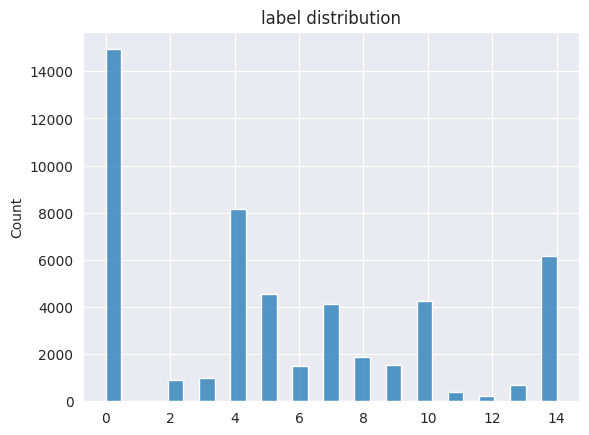

/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


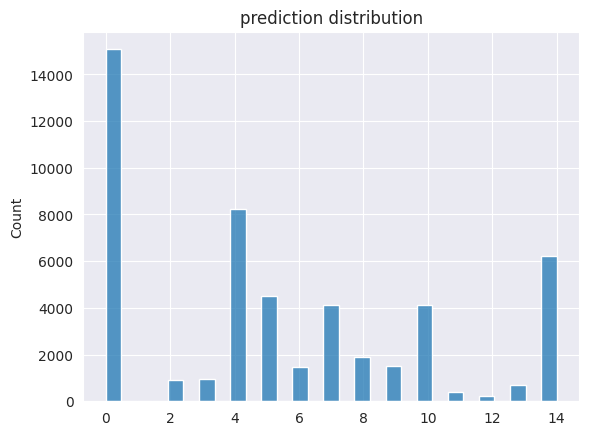

In [52]:
import seaborn as sns

sns.histplot(labels)
plt.title('label distribution')
plt.show()
sns.histplot(preds)
plt.title('prediction distribution')
plt.show()

## analyzing prediction results for strategy classifier in ESConv dataset

In [54]:
import pandas as pd

df = pd.read_csv('./original_data/train_strategies.txt', sep='\t')
preds = df['prediction'].values
preds = le.fit_transform(preds)
preds[:10]

array([ 9,  9, 13,  9,  9,  9,  9,  9, 13,  9])

/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/navid/anaconda3/envs/gen/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


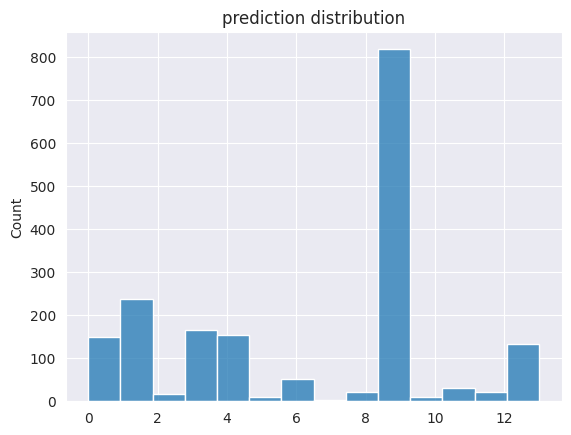

In [55]:
import seaborn as sns

sns.histplot(preds)
plt.title('prediction distribution')
plt.show()